## Table Of Contents

* [Exploratory Data Analysis](#eda)
    * [Target Feature](#targetfeature)
    * [Numerical Features](#numericalfeatures)
    * [Categorical Features](#categoricalfeatures)
    * [Inferential Statistics]((#Inferentialstatistics)
    

### Exploratory Data Analysis <a class="eda" id="dw"></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df=pd.read_csv('data\DataWranglingBankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [27]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [7]:
round(df['Attrition_Flag'].value_counts()/df.shape[0]*100,2)

Existing Customer    83.93
Attrited Customer    16.07
Name: Attrition_Flag, dtype: float64

##### A very small % of data is churned. So it is imbalanced data.

In [8]:
dfo = df.select_dtypes(include=['object'])
dfo.shape
#get levels for all variables
vn = pd.DataFrame(dfo.nunique()).reset_index()
vn.columns = ['VarName', 'LevelsCount']
vn.sort_values(by='LevelsCount', ascending =False)
vn

,VarName,LevelsCount
0,Attrition_Flag,2
1,Gender,2
2,Education_Level,7
3,Marital_Status,4
4,Income_Category,6
5,Card_Category,4


##### There are 6 categorical features in the data

#### Numerical Features <a class="anchor" id="numericalfeatures"></a>

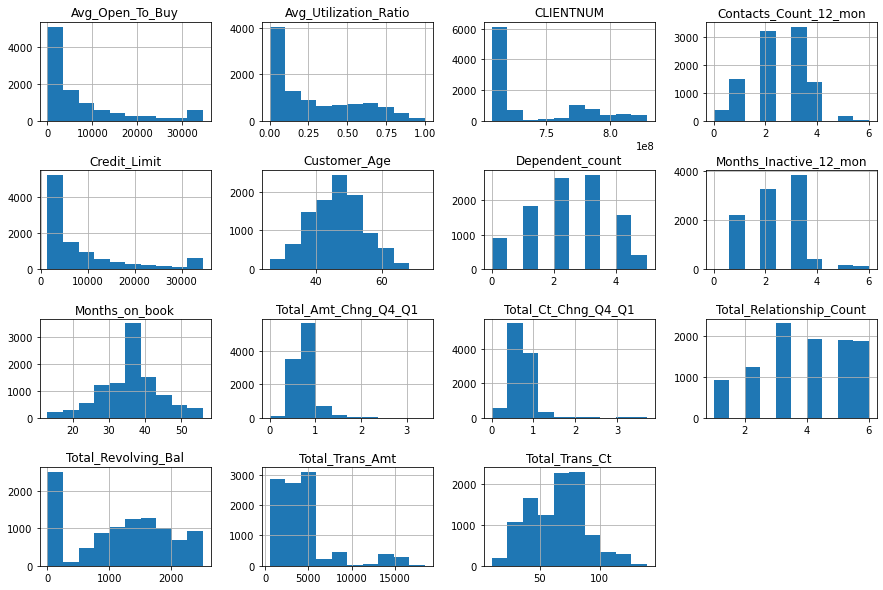

In [9]:
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

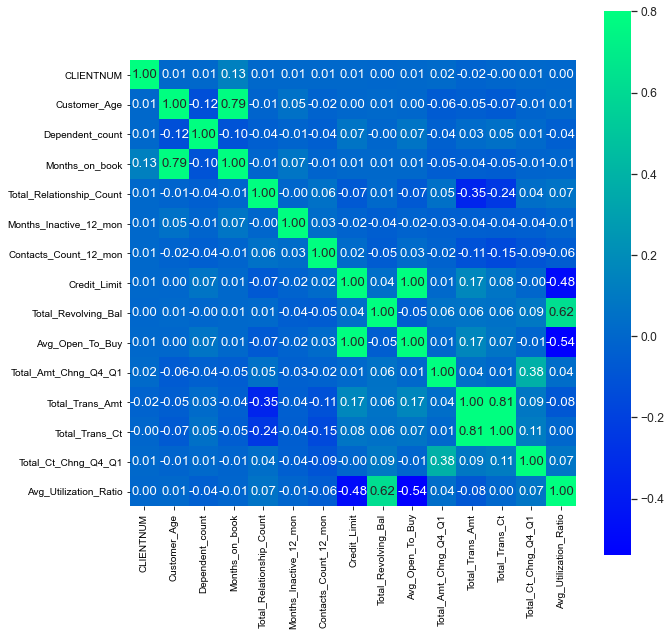

In [10]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.set(font_scale=1.1)
sns.heatmap(df.corr(), vmax=.8, square=True, annot=True, fmt='.2f',  cmap='winter')
plt.show()

##### We see that Avg_open_to_buy and credit limit are highly correlated. 
##### Next comes customer age and Months on book.
##### Total_trans_count and Total_trans_amt are also highly correlated. 
##### Avg_utilization_ratio and Total_Revolving_bal also seem to be correlated, but we will verify with the numbers.

In [12]:
#df = df.drop('Months_on_book', axis=1)

In [13]:
df_attrited = df[df['Attrition_Flag']=='Attrited Customer']
df_existing = df[df['Attrition_Flag']=='Existing Customer']

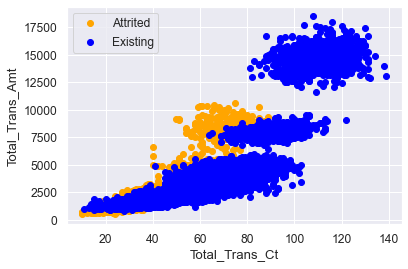

In [18]:
plt.scatter(df_attrited.Total_Trans_Ct, df_attrited.Total_Trans_Amt, marker = 'o', color = 'orange', label = 'Attrited')
plt.scatter(df_existing.Total_Trans_Ct, df_existing.Total_Trans_Amt, marker = 'o', color = 'blue', label = 'Existing')
plt.xlabel('Total_Trans_Ct')
plt.ylabel('Total_Trans_Amt')
plt.legend(loc='upper left')
plt.show()

##### More customers who have left have few transaction counts than existing customers.

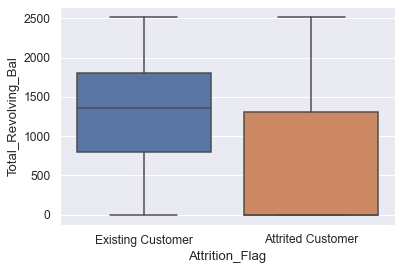

In [36]:
sns.boxplot(df['Attrition_Flag'], df['Total_Revolving_Bal'] )
plt.show()

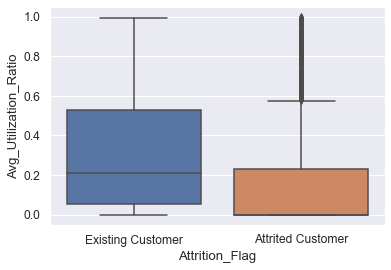

In [37]:
sns.boxplot(df['Attrition_Flag'], df['Avg_Utilization_Ratio'] )
plt.show()

##### Lower revolving balance and Average utilization ratio gets customers leaving.

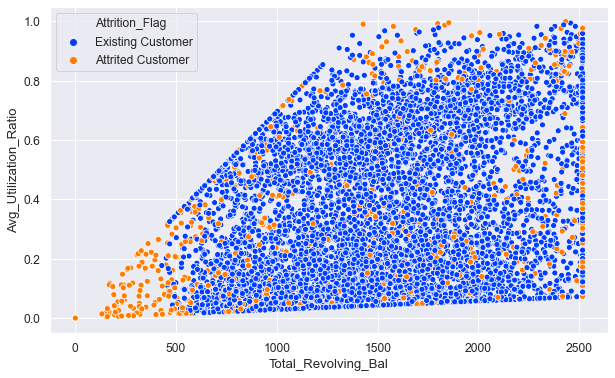

In [38]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Total_Revolving_Bal', y='Avg_Utilization_Ratio', hue='Attrition_Flag', palette="bright")
plt.show()

##### Both Total_Revolving_Bal and Avg_Utilization_Ratio are similar, we can remove one of them, Avg_Utilization_Ratio later.

In [28]:
pd.crosstab(df['Contacts_Count_12_mon'], df['Attrition_Flag'], values = 'CLIENTNUM', aggfunc='count').apply(lambda x:100 * x / float(x.sum())).round(2)

Attrition_Flag,Attrited Customer,Existing Customer
Contacts_Count_12_mon,,
0,0.43,4.61
1,6.64,16.36
2,24.77,33.22
3,41.86,31.75
4,19.36,12.67
5,3.63,1.38
6,3.32,NaN


#### Categorical features <a class="anchor" id="categoricalfeatures"></a>

In [39]:
pd.crosstab(df['Gender'], df['Attrition_Flag'], values = 'CLIENTNUM', aggfunc='count').apply(lambda x:100 * x / float(x.sum())).round(2)

Attrition_Flag,Attrited Customer,Existing Customer
Gender,,
F,57.16,52.09
M,42.84,47.91


##### There is a slight increase in female customers who are churned than male customers.

In [ ]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Education_Level', hue='Attrition_Flag', data=df)

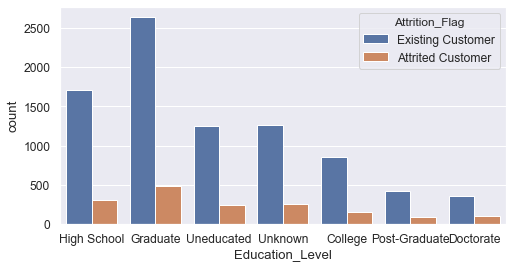

In [15]:
plt.figure(figsize=(8,4))
sns.countplot(x='Education_Level', hue='Attrition_Flag', data=df)
plt.show()

In [41]:
pd.crosstab(df['Education_Level'], df['Attrition_Flag'], values = 'CLIENTNUM', aggfunc='count').apply(lambda x:100 * x / float(x.sum())).round(2)

Attrition_Flag,Attrited Customer,Existing Customer
Education_Level,,
College,9.47,10.11
Doctorate,5.84,4.19
Graduate,29.93,31.07
High School,18.81,20.08
Post-Graduate,5.65,4.99
Uneducated,14.57,14.71
Unknown,15.73,14.86


#####  There is no relation between education and customer retaining. We will check this with inferential statistics

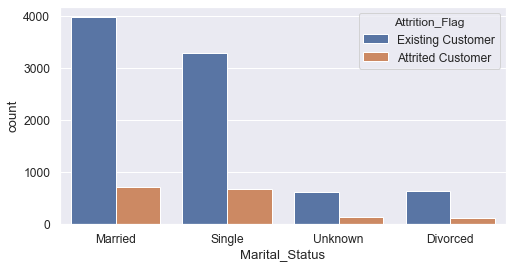

In [16]:
plt.figure(figsize=(8,4))
sns.countplot(x='Marital_Status', hue='Attrition_Flag', data=df)
plt.show()

In [43]:
pd.crosstab(df['Marital_Status'], df['Attrition_Flag'], values = 'CLIENTNUM', aggfunc='count').apply(lambda x:100 * x / float(x.sum())).round(2)

Attrition_Flag,Attrited Customer,Existing Customer
Marital_Status,,
Divorced,7.44,7.38
Married,43.58,46.80
Single,41.06,38.53
Unknown,7.93,7.29


##### Higher percentage of married customers tend to stay longer than Single customers.

In [19]:
pd.crosstab(df['Income_Category'], df['Attrition_Flag'], values = 'CLIENTNUM', aggfunc='count').apply(lambda x:100 * x / float(x.sum())).round(2)

Attrition_Flag,Attrited Customer,Existing Customer
Income_Category,,
$120K +,7.74,7.07
$40K - $60K,16.66,17.87
$60K - $80K,11.62,14.27
$80K - $120K,14.87,15.21
Less than $40K,37.62,34.69
Unknown,11.49,10.88


##### Highest and lowest income catgory tend to leave, the difference is very less though.

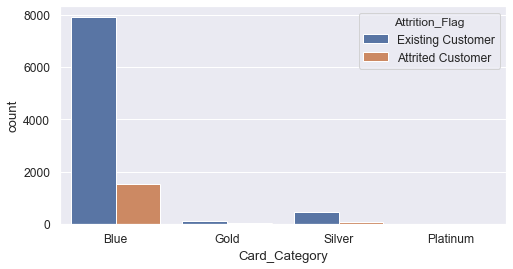

In [20]:
plt.figure(figsize=(8,4))
sns.countplot(x='Card_Category', hue='Attrition_Flag', data=df)
plt.show()

#####  There are more blue card customers than others in the dataset

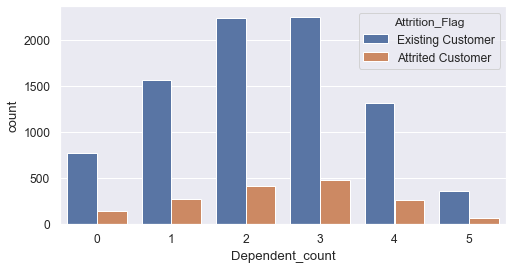

In [23]:
plt.figure(figsize=(8,4))
sns.countplot(x='Dependent_count', hue='Attrition_Flag', data=df)
plt.show()

In [21]:
# Saving this data for preprocessing
df.to_csv('data\EDABankChurners.csv', index=False)

#### Inferential Statistics <a class="anchor" id="inferentialstatistics"></a>

Hypothesis:
    Is the avg age of people who have churned is equal to avg age of people who have not churned.

In [31]:
df_churned = df[['Customer_Age','Attrition_Flag']] [df['Attrition_Flag'] == 'Attrited Customer']
df_notchurned = df[['Customer_Age','Attrition_Flag']][df['Attrition_Flag'] == 'Existing Customer']

In [32]:
from scipy.stats import ttest_ind
ttest_ind(df_churned['Customer_Age'], df_notchurned['Customer_Age'])

Ttest_indResult(statistic=1.8319590211710879, pvalue=0.06698688501759036)

Since p-value is less than 0.5, we can conclude that there is no relation between average age and customer churning.

Hypothesis:
    Is the mean of credit limit of churned customers equal to mean of credit limit of existing customers.

In [33]:
df_churned = df[['Credit_Limit','Attrition_Flag']] [df['Attrition_Flag'] == 'Attrited Customer']
df_notchurned = df[['Credit_Limit','Attrition_Flag']][df['Attrition_Flag'] == 'Existing Customer']

In [34]:
from scipy.stats import ttest_ind
ttest_ind(df_churned['Credit_Limit'], df_notchurned['Credit_Limit'])

Ttest_indResult(statistic=-2.4028585836343748, pvalue=0.016285357205394337)

Since p-value is less than 0.5, we can conclude that there is no relation between credit limit and customer churning.